In [1]:

# Chapitr4 Exo1 :

import numpy as np

# 1. Création avec la fonction array
M1 = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9],
    [10, 11, 12]
])

print("M1 créée avec array:")
print(M1)

# 2. Création avec arange + reshape
M2 = np.arange(1, 13).reshape(4, 3)

print("\nM2 créée avec arange + reshape:")
print(M2)

# 3. Accès aux éléments demandés
print("\nM[2, :] : 3ème ligne entière")
print(M2[2, :])  # ligne d'indice 2 = 3ème ligne

print("\nM[2:] : De la 3ème ligne jusqu'à la fin")
print(M2[2:])    # lignes 2, 3 (3ème et 4ème)

M1 créée avec array:
[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]

M2 créée avec arange + reshape:
[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]

M[2, :] : 3ème ligne entière
[7 8 9]

M[2:] : De la 3ème ligne jusqu'à la fin
[[ 7  8  9]
 [10 11 12]]


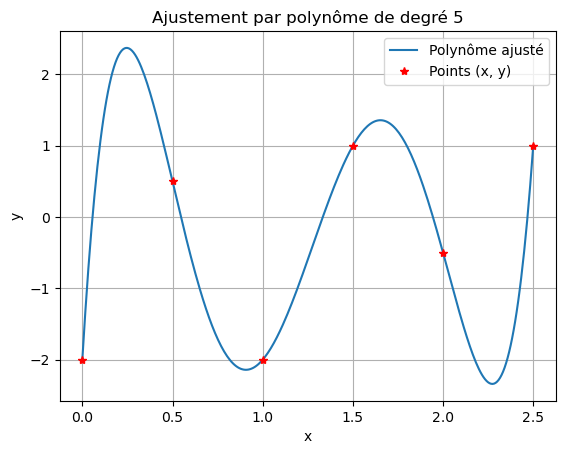

In [2]:
# Chapitre4 Exo2: 

import numpy as np
import matplotlib.pyplot as plt

# Vecteurs donnés
x = np.array([0.0, 0.5, 1.0, 1.5, 2.0, 2.5])
y = np.array([-2.0, 0.5, -2.0, 1.0, -0.5, 1.0])

# 1. Construction de la matrice V (polynôme de degré 5, colonne i = x**(5-i))
V = np.vander(x, 6)  # construit directement la matrice souhaitée

# 2. Résolution du système Va = y
a = np.linalg.solve(V, y)

# 3. Définir la fonction poly(a, z)
def poly(a, z):
    """ Calcule le polynôme p(z) = a[5]*z^0 + a[4]*z^1 + ... + a[0]*z^5 """
    return sum(a[5 - i] * z**i for i in range(6))

# 4. Tracer le polynôme et les points (xi, yi)
z_vals = np.linspace(min(x), max(x), 300)
p_vals = [poly(a, z) for z in z_vals]

plt.plot(z_vals, p_vals, label="Polynôme ajusté")
plt.plot(x, y, '*', label="Points (x, y)", color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Ajustement par polynôme de degré 5')
plt.legend()
plt.grid(True)
plt.show()


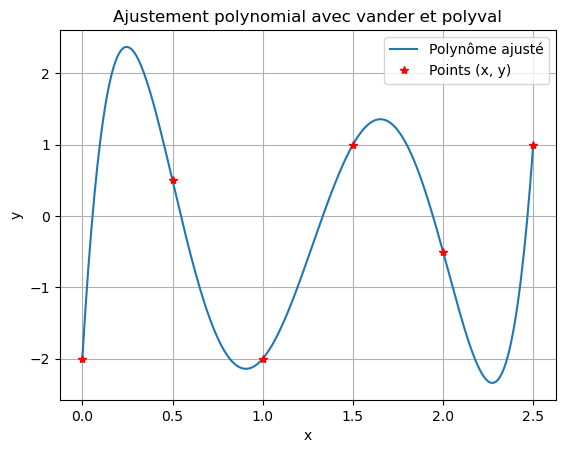

In [3]:
# Chapitre4 Exo3:
import numpy as np
import matplotlib.pyplot as plt

# Données fournies
x = np.array([0.0, 0.5, 1.0, 1.5, 2.0, 2.5])
y = np.array([-2.0, 0.5, -2.0, 1.0, -0.5, 1.0])

# 1. Construire la matrice de Vandermonde (avec puissances décroissantes)
V = np.vander(x, 6)  # degré 5 → 6 colonnes

# 2. Résoudre le système Va = y
a = np.linalg.solve(V, y)  # a contient les coefficients du polynôme du degré 5

# 3. Évaluer le polynôme avec np.polyval (qui attend les puissances décroissantes)
z_vals = np.linspace(min(x), max(x), 300)
p_vals = np.polyval(a, z_vals)

# 4. Tracer le polynôme et les points originaux
plt.plot(z_vals, p_vals, label="Polynôme ajusté")
plt.plot(x, y, '*', label="Points (x, y)", color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Ajustement polynomial avec vander et polyval')
plt.legend()
plt.grid(True)
plt.show()


In [16]:
#Chapitre 4 Exo4:

# Implémentation Python (sans boucle for)  

# main.py

import numpy as np
import importlib
import moving_average

importlib.reload(moving_average) 
# Exemple de données
u = np.array([1, 2, 3, 4, 5, 6, 7])

# Appel de la fonction avec n = 3
xi = moving_average.moving_averagef(u, 3)

print("Tableau original u :", u)
print("Moyenne glissante (n=3) :", xi)



Tableau original u : [1 2 3 4 5 6 7]
Moyenne glissante (n=3) : [2. 3. 4. 5. 6.]


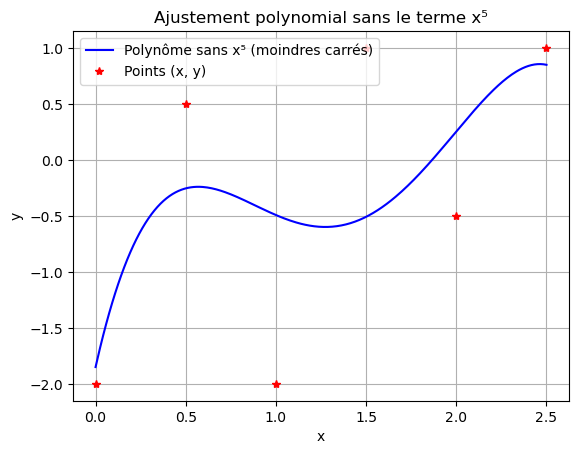

In [18]:
# Chapitre 4 Exo5:

import numpy as np
import matplotlib.pyplot as plt

# Données d'après l'exercice 2
x = np.array([0.0, 0.5, 1.0, 1.5, 2.0, 2.5])
y = np.array([-2.0, 0.5, -2.0, 1.0, -0.5, 1.0])

# 1. Matrice de Vandermonde complète
V = np.vander(x, 6)

# 2. Supprimer la 1re colonne (x^5)
W = V[:, 1:]  # W = [x^4, x^3, ..., x^0]

# 3. Résolution par moindres carrés
b, residuals, rank, s = np.linalg.lstsq(W, y, rcond=None)

# 4. Évaluer et tracer le polynôme défini par b
z_vals = np.linspace(min(x), max(x), 300)
p_vals = np.polyval(b, z_vals)

# Affichage
plt.plot(z_vals, p_vals, label="Polynôme sans x⁵ (moindres carrés)", color="blue")
plt.plot(x, y, '*', label="Points (x, y)", color="red")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Ajustement polynomial sans le terme x⁵")
plt.legend()
plt.grid(True)
plt.show()



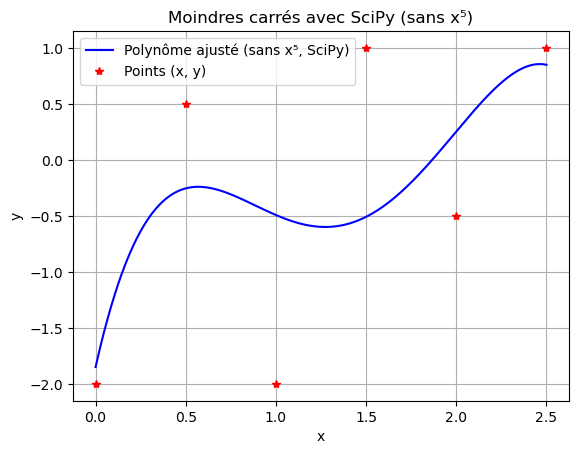

In [19]:
# Chapitre 4 Exo6:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.linalg import lstsq  # Import depuis SciPy

# Données d'entrée
x = np.array([0.0, 0.5, 1.0, 1.5, 2.0, 2.5])
y = np.array([-2.0, 0.5, -2.0, 1.0, -0.5, 1.0])

# Construire la matrice de Vandermonde complète (x^5 → x^0)
V = np.vander(x, 6)

# Supprimer la première colonne (x^5) pour obtenir W = [x^4, ..., x^0]
W = V[:, 1:]

# Résolution du système Wb = y par moindres carrés avec SciPy
b, residuals, rank, s = lstsq(W, y)

# Évaluation du polynôme défini par b (b contient les coeffs de x^4 à x^0)
z_vals = np.linspace(min(x), max(x), 300)
p_vals = np.polyval(b, z_vals)

# Affichage
plt.plot(z_vals, p_vals, label="Polynôme ajusté (sans x⁵, SciPy)", color="blue")
plt.plot(x, y, '*', label="Points (x, y)", color="red")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Moindres carrés avec SciPy (sans x⁵)")
plt.legend()
plt.grid(True)
plt.show()




In [2]:
#Chapitre 4 Exo7:

import numpy as np

# 1. Définir un vecteur u (et le normaliser pour qu'il soit unitaire)
u = np.array([1, 2, 3], dtype=float)
u = u / np.linalg.norm(u)  # normalisation : ||u|| = 1

# 2. Construire la matrice de projection P = u @ u.T
P = np.outer(u, u)  # produit extérieur (matrice de projection sur u)

# 3. Construire la matrice Q = I - P
I = np.identity(len(u))
Q = I - P

# 4. Vérifier expérimentalement que u est un vecteur propre de P et Q
Pu = P @ u
Qu = Q @ u

print("u :", u)
print("P @ u :", Pu)
print("Q @ u :", Qu)

# 5. Comparer P @ u ≈ λ * u → valeur propre de P
lambda_P = np.dot(Pu, u) / np.dot(u, u)  # produit scalaire pour approximer λ
lambda_Q = np.dot(Qu, u) / np.dot(u, u)

print(f"\nValeur propre pour P (λ) : {lambda_P:.4f}")
print(f"Valeur propre pour Q (λ) : {lambda_Q:.4f}")


u : [0.26726124 0.53452248 0.80178373]
P @ u : [0.26726124 0.53452248 0.80178373]
Q @ u : [-1.38777878e-17 -5.55111512e-17 -5.55111512e-17]

Valeur propre pour P (λ) : 1.0000
Valeur propre pour Q (λ) : -0.0000


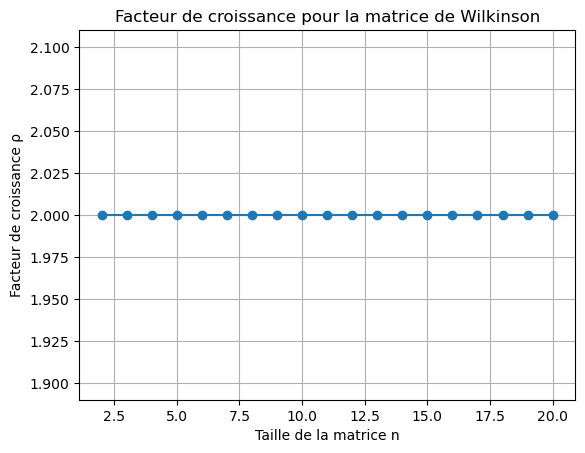

In [3]:
# Chapitre 4 Exo 8 

import numpy as np
from scipy.linalg import lu
import matplotlib.pyplot as plt

def wilkinson_matrix(n):
    """
    Crée une matrice de Wilkinson de taille n x n.
    C'est une matrice triangulaire inférieure avec des 1 partout,
    et des -1 sur la dernière colonne sauf en bas à droite.
    """
    A = np.tril(np.ones((n, n)))
    A[:, -1] = -1
    A[-1, -1] = 1
    return A

def growth_factor(A, U):
    """
    Calcule le facteur de croissance : max|U| / max|A|
    """
    return np.max(np.abs(U)) / np.max(np.abs(A))

# Étude pour différentes tailles n
ns = range(2, 21)
factors = []

for n in ns:
    A = wilkinson_matrix(n)
    P, L, U = lu(A)
    rho = growth_factor(A, U)
    factors.append(rho)

# Affichage des résultats
plt.plot(ns, factors, marker='o')
plt.xlabel("Taille de la matrice n")
plt.ylabel("Facteur de croissance ρ")
plt.title("Facteur de croissance pour la matrice de Wilkinson")
plt.grid(True)
plt.show()
